In [1]:
import os
import sys
import scipy.io
import scipy.misc
import imageio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from Functions import *
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


This is the content image :



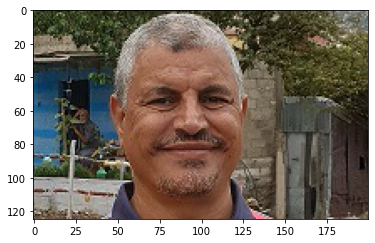

In [2]:
# Display the content image

content_path = "baba.jpg" 
"""input("input your content image name with the image extension")"""

Content = imageio.imread("Contents/" + content_path)

print("This is the content image :")
print("")

imshow(Content)

This is the style image :



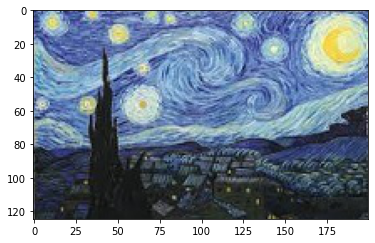

In [3]:
# Display the style image

style_path = "van-gogh.jpg" 

"""input("input your style image path with the image extension")"""

Style = imageio.imread("Styles/" + style_path)

print("This is the style image :")
print("")

imshow(Style)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


This is the generated image :



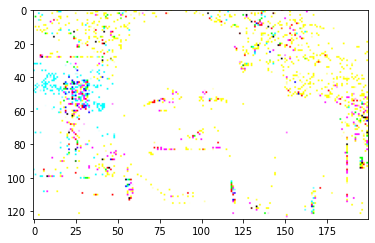

In [4]:
# Create & Display the generated image

Generated = noise_image(Content)

"""scipy.misc.imread(style_path)"""

print("This is the generated image :")
print("")

imshow(Generated)

In [5]:
Content = reshape_normalize_image(Content)

Style = reshape_normalize_image(Style)

Generated = reshape_normalize_image(Generated)

STYLE_LAYERS = [('conv1_1', 0.018), ('conv2_1', 0.036), ('conv3_1', 0.072), ('conv4_1', 0.109), ('conv5_1', 0.145)]

In [6]:
tf.reset_default_graph()

sess = tf.InteractiveSession()

model = load_vgg_model("Pre-trained/imagenet-vgg-verydeep-19.mat")

sess.run(model['input'].assign(Content))

out = model['conv4_1']

a_C = sess.run(out)

a_G = out

J_content = content_cost(a_C, a_G)

sess.run(model['input'].assign(Style))

J_style = style_cost(model, STYLE_LAYERS, sess)

J = cost(J_content, J_style)

In [ ]:
model_nn(sess, model, Generated, J, J_content, J_style)

Iteration 0 :
total cost = 5835.879
content cost = 68.58452
style cost = 1441.8236
Iteration 100 :
total cost = 181.63483
content cost = 29.55392
style cost = 38.020226
Iteration 200 :
total cost = 176.69365
content cost = 30.6526
style cost = 36.51026
Iteration 300 :
total cost = 228.47574
content cost = 32.565773
style cost = 48.977493
Iteration 400 :
total cost = 155.33759
content cost = 29.500296
style cost = 31.459324
Iteration 500 :
total cost = 97.50012
content cost = 26.002827
style cost = 17.874323
Iteration 600 :
total cost = 188.79688
content cost = 32.09214
style cost = 39.176186
Iteration 700 :
total cost = 254.5532
content cost = 33.427475
style cost = 55.281433
Iteration 800 :
total cost = 143.9399
content cost = 26.010256
style cost = 29.482409
Iteration 900 :
total cost = 351.7631
content cost = 36.273182
style cost = 78.872475


array([[[[ -2.0550756 ,   2.3879018 ,   0.5100635 ],
         [ -1.2367103 ,   1.3589511 ,  -2.5933895 ],
         [ -2.0925834 ,   0.31721425,   2.4222035 ],
         ...,
         [ -3.7960284 ,   0.4144078 ,   3.1534967 ],
         [  0.12839568,  -0.04216797,  -1.6881789 ],
         [ -4.3350716 ,   1.4122198 ,   1.5858955 ]],

        [[  0.16258372,  -0.31380203,  -2.152833  ],
         [  1.5480822 ,   3.5302606 ,  -4.5550904 ],
         [  0.9169043 ,   0.17960212,  -3.552537  ],
         ...,
         [  0.82255614,  -0.2557621 ,  -1.6152647 ],
         [  2.5041409 ,   2.9286084 ,  -6.6082964 ],
         [  1.3125542 ,   0.7448403 ,  -4.2836313 ]],

        [[ -0.6643976 ,   0.12972508,   0.8630258 ],
         [  0.50094455,  -2.0462523 ,   0.42623764],
         [ -3.3938181 ,  -2.0056968 ,   5.955298  ],
         ...,
         [ -1.0667943 ,  -1.3377854 ,   2.0730822 ],
         [ -2.0238497 ,  -1.9497964 ,   2.9214187 ],
         [ -1.1031393 ,  -0.38612437,   2.1452906 ]],

In [ ]:
sess.close()

In [ ]:
# Display the generated image

generated_path = 'Generated/generated_image.jpg'

Generated = imageio.imread(generated_path)

print("This is the generated image :")
print("")

imshow(G)